mounting drive to colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here's where I have uploaded the csv file

In [2]:
file_path = '/content/drive/MyDrive/HW3/metadata.csv'

Reading the CSV file (with pandas)

In [3]:
import pandas as pd
df = pd.read_csv(file_path)

this is how the csv file looks like

In [4]:
df.head(10)

,filename,giraffe,zebra
0,000000000001.jpg,0,1
1,000000000002.jpg,0,1
2,000000000003.jpg,0,1
3,000000000004.jpg,0,1
4,000000000005.jpg,1,0
5,000000000006.jpg,1,0
6,000000000007.jpg,1,0
7,000000000008.jpg,0,1
8,000000000009.jpg,0,1
9,000000000010.jpg,0,1


csv file statistics

In [5]:
row, col = df.shape[0], df.shape[1]
print(f'Number of Rows    : {row}')
print(f'Number of Columns : {col}')

Number of Rows    : 4948
Number of Columns : 3


number of images where giraffe = 1 (at least there's one giraffe)

In [6]:
giraffe_count = len(df.iloc[df.index[df.iloc[:, 1] == 1]])
print(f'Number of images where there is at least one giraffe : {giraffe_count}')

Number of images where there is at least one giraffe : 550


number of images where zebra = 1 (at least there's one zebra)

In [7]:
zebra_count = len(df.iloc[df.index[df.iloc[:, 2] == 1]])
print(f'Number of images where there is at least one zebra : {zebra_count}')

Number of images where there is at least one zebra : 4405


**proportion before spilt**

In [8]:
zerba_percentage = zebra_count / (giraffe_count + zebra_count)
giraffe_percentage = giraffe_count / (giraffe_count + zebra_count)

print(f"Zebra (%)   : {zerba_percentage * 100:.2f} %")
print(f"Giraffe (%) : {giraffe_percentage * 100:.2f} %")

Zebra (%)   : 88.90 %
Giraffe (%) : 11.10 %


number of images where giraffe = 1 & zebra = 0 (at least there's one giraffe & NO zebra)

In [9]:
giraffe_no_zerba_count = len(df[(df.iloc[:, 1] == 1) & (df.iloc[:, 2] == 0)])
print(f'Number of images where there is at least one giraffe & no zerba : {giraffe_no_zerba_count}')

Number of images where there is at least one giraffe & no zerba : 543


number of images where giraffe = 0 & zebra = 1 (at least there's one zebra & NO giraffe)

In [10]:
zebra_no_giraffe_count = len(df[(df.iloc[:, 1] == 0) & (df.iloc[:, 2] == 1)])
print(f'Number of images where there is at least one zebra & no giraffe : {zebra_no_giraffe_count}')

Number of images where there is at least one zebra & no giraffe : 4398


number of images where giraffe = 1 & zebra = 1 (at least there's one giraffe & one  zebra)

In [11]:
zebra_and_giraffe_count = len(df[(df.iloc[:, 1] == 1) & (df.iloc[:, 2] == 1)])
print(f'Number of images where there is at least one giraffe & one zebra : {zebra_and_giraffe_count}')

Number of images where there is at least one giraffe & one zebra : 7


number of images where giraffe = 0 & zebra = 0 (at least there's no giraffe & no zebra)

In [12]:
no_zebra_no_giraffe_count = len(df[(df.iloc[:, 1] == 0) & (df.iloc[:, 2] == 0)])
print(f'Number of images where there is at least one giraffe & one zebra : {no_zebra_no_giraffe_count}')

Number of images where there is at least one giraffe & one zebra : 0


tabular representation

In [13]:
tableData = {'Zebra=0': [no_zebra_no_giraffe_count, zebra_no_giraffe_count],
             'Zebra=1': [giraffe_no_zerba_count, zebra_and_giraffe_count]}

rows = ['Giraffe=0', 'Giraffe=1']
table = pd.DataFrame(tableData, index=rows)

In [14]:
table

,Zebra=0,Zebra=1
Giraffe=0,0,543
Giraffe=1,4398,7


Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
def split_images(csv_file) :

    df = pd.read_csv(csv_file)

    # Train : 0.70 - Validation : 0.15 - Test : 0.15

    train_df, test_val_df = train_test_split(df, test_size=0.3, stratify=df[['giraffe', 'zebra']])                      # Train : 0.70 -- Validation + Test : 0.30
    valid_df, test_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df[['giraffe', 'zebra']])        # Validation : 0.50 of 30 = 0.15 -- Test : 0.50 of 0.30 = 0.15

    return train_df, valid_df, test_df

In [17]:
train_df, val_df, test_df = split_images(file_path)

checking split

In [18]:
print("Number of images in Training Data   : ", len(train_df))
print("Number of images in Validation Data : ", len(val_df))
print("Number of images in Testing Data    : ", len(test_df))

Number of images in Training Data   :  3463
Number of images in Validation Data :  742
Number of images in Testing Data    :  743


In [19]:
giraffe_count_train = len(train_df[train_df['giraffe'] == 1])
giraffe_count_val = len(val_df[val_df['giraffe'] == 1])
giraffe_count_test = len(test_df[test_df['giraffe'] == 1])

In [20]:
print(f'Number of images in Training Dataset where there is at least one giraffe : {giraffe_count_train}')
print(f'Number of images in Validation Dataset where there is at least one giraffe : {giraffe_count_val}')
print(f'Number of images in Testing Dataset where there is at least one giraffe : {giraffe_count_test}')

Number of images in Training Dataset where there is at least one giraffe : 385
Number of images in Validation Dataset where there is at least one giraffe : 82
Number of images in Testing Dataset where there is at least one giraffe : 83


In [21]:
zebra_count_train = len(train_df[train_df['zebra'] == 1])
zebra_count_val = len(val_df[val_df['zebra'] == 1])
zebra_count_test = len(test_df[test_df['zebra'] == 1])

In [22]:
print(f'Number of images in Training Dataset where there is at least one zebra : {zebra_count_train}')
print(f'Number of images in Validation Dataset where there is at least one zebra : {zebra_count_val}')
print(f'Number of images in Testing Dataset where there is at least one zebra : {zebra_count_test}')

Number of images in Training Dataset where there is at least one zebra : 3083
Number of images in Validation Dataset where there is at least one zebra : 661
Number of images in Testing Dataset where there is at least one zebra : 661


In [23]:
giraffe_zebra_count_train = len(train_df[(train_df['giraffe'] == 1) & (train_df['zebra'] == 1)])
giraffe_zebra_count_val = len(val_df[(val_df['giraffe'] == 1) & (val_df['zebra'] == 1)])
giraffe_zebra_count_test = len(test_df[(test_df['giraffe'] == 1) & (test_df['zebra'] == 1)])

In [24]:
print(f'Number of images in Training Dataset where there is at least one giraffe & one zebra : {giraffe_zebra_count_train}')
print(f'Number of images in Validation Dataset where there is at least one giraffe & one zebra : {giraffe_zebra_count_val}')
print(f'Number of images in Testing Dataset where there is at least one giraffe & one zebra : {giraffe_zebra_count_test}')

Number of images in Training Dataset where there is at least one giraffe & one zebra : 5
Number of images in Validation Dataset where there is at least one giraffe & one zebra : 1
Number of images in Testing Dataset where there is at least one giraffe & one zebra : 1


zerba-giraffe proportion after split

In [25]:
giraffe_proportion_train = giraffe_count_train/(giraffe_count_train+zebra_count_train)
giraffe_proportion_test = giraffe_count_test/(giraffe_count_test+zebra_count_test)
giraffe_proportion_val = giraffe_count_val/(giraffe_count_val+zebra_count_val)

zebra_proportion_train = zebra_count_train/(giraffe_count_train+zebra_count_train)
zebra_proportion_test = zebra_count_test/(giraffe_count_test+zebra_count_test)
zebra_proportion_val = zebra_count_val/(giraffe_count_val+zebra_count_val)

In [26]:
title = "Zerba-Giraffe Proportion (After Split)"
print(title)
print("="*len(title))
print(f"Giraffe (%) in Training   : {giraffe_proportion_train * 100:.2f} %")
print(f"Giraffe (%) in Validation : {giraffe_proportion_val * 100:.2f} %")
print(f"Giraffe (%) in Testing    : {giraffe_proportion_test * 100:.2f} %")
print('-----------------------------------')
print(f"Zebra   (%) in Training   : {zebra_proportion_train * 100:.2f} %")
print(f"Zebra   (%) in Validation : {zebra_proportion_val * 100:.2f} %")
print(f"Zebra   (%) in Testing    : {zebra_proportion_test * 100:.2f} %")

Zerba-Giraffe Proportion (After Split)
Giraffe (%) in Training   : 11.10 %
Giraffe (%) in Validation : 11.04 %
Giraffe (%) in Testing    : 11.16 %
-----------------------------------
Zebra   (%) in Training   : 88.90 %
Zebra   (%) in Validation : 88.96 %
Zebra   (%) in Testing    : 88.84 %


reminder : proportion before split

In [27]:
title = "Zerba-Giraffe Proportion (Before Split)"
print(title)
print("="*len(title))
print(f"Zebra (%)   : {zerba_percentage * 100:.2f} %")
print(f"Giraffe (%) : {giraffe_percentage * 100:.2f} %")

Zerba-Giraffe Proportion (Before Split)
Zebra (%)   : 88.90 %
Giraffe (%) : 11.10 %


task 2 : custom image dataset

In [28]:
import torch
import os
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

In [29]:
class CustomDataset(Dataset):

    def __init__(self, split_df, img_dir, transform=None):
        self.split_df = split_df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.split_df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.split_df.iloc[idx, 0])

        image = Image.open(img_name).convert('RGB')               # Mode : RGB
        '''
        # Mode : GrayScale
        image = Image.open(img_name).convert('L')
        image = Image.merge('RGB', (image, image, image))
        '''
        if self.transform:
            image = self.transform(image)

        label = torch.tensor(self.split_df.iloc[idx, 1:].tolist(), dtype=torch.float32)

        return image, label

task 3

In [30]:
height, width = 256, 256

In [31]:
train_dataset = CustomDataset(train_df, '/content/drive/MyDrive/HW3/images', transform=transforms.Compose([transforms.Resize((height, width)), transforms.ToTensor()]))
val_dataset = CustomDataset(val_df, '/content/drive/MyDrive/HW3/images', transform=transforms.Compose([transforms.Resize((height, width)), transforms.ToTensor()]))
test_dataset = CustomDataset(test_df, '/content/drive/MyDrive/HW3/images', transform=transforms.Compose([transforms.Resize((height, width)), transforms.ToTensor()]))

task 4 : random image display

In [32]:
import matplotlib.pyplot as plt

In [33]:
import random

In [38]:
random.seed(100)

def explore_dataset(dataset, title, num_samples=10):

    print("Statistics : " + title + '\n' + '='*len("Statistics : "+title) + '\n', end='')

    print(f"Number of images : {len(dataset)}")
    species_counts = dataset.split_df.iloc[:, 1:].sum()
    print(f"Giraffe Count : {species_counts['giraffe']}\nZebra Count: {species_counts['zebra']}\n")

    random_samples = random.sample(range(len(dataset)), min(num_samples, len(dataset)))

    plt.figure(figsize=(15, 6))
    plt.suptitle(f"{num_samples} Random Images : {title}", fontsize=14, fontweight='bold', fontfamily='serif')

    for i, idx in enumerate(random_samples, 1):
        img, label = dataset[idx]
        plt.subplot(2, 5, i)
        plt.imshow(img.permute(1, 2, 0))
        plt.title(f"Giraffe: {label[0]}, Zebra: {label[1]}")
        plt.axis('off')

    plt.show()

Statistics : Training Data
Number of images : 3463
Giraffe Count : 385
Zebra Count: 3083



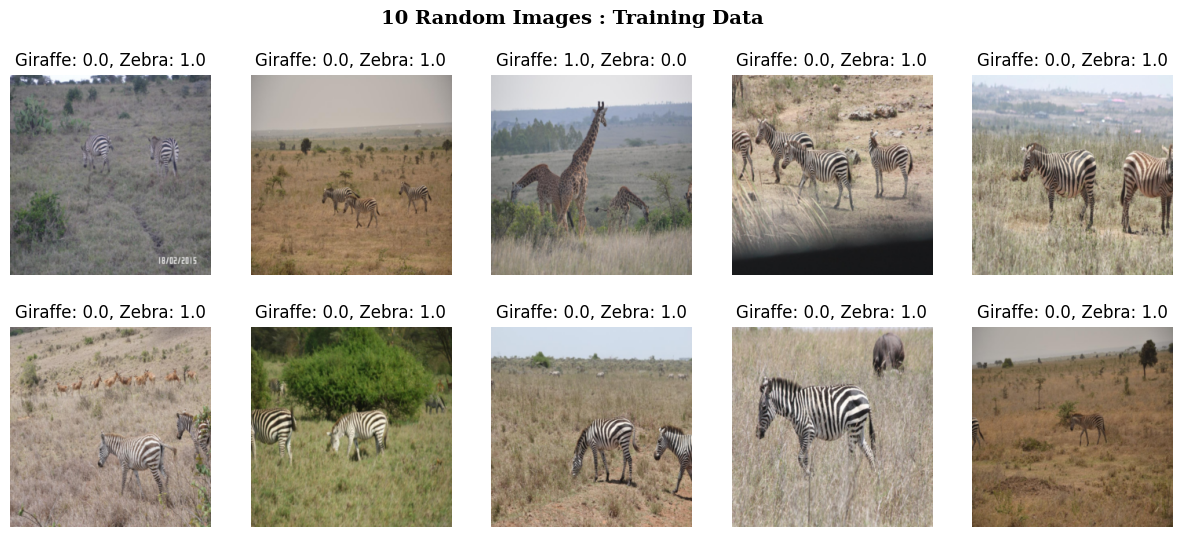

In [39]:
explore_dataset(train_dataset, title="Training Data")

Statistics : Validation Data
Number of images : 742
Giraffe Count : 82
Zebra Count: 661



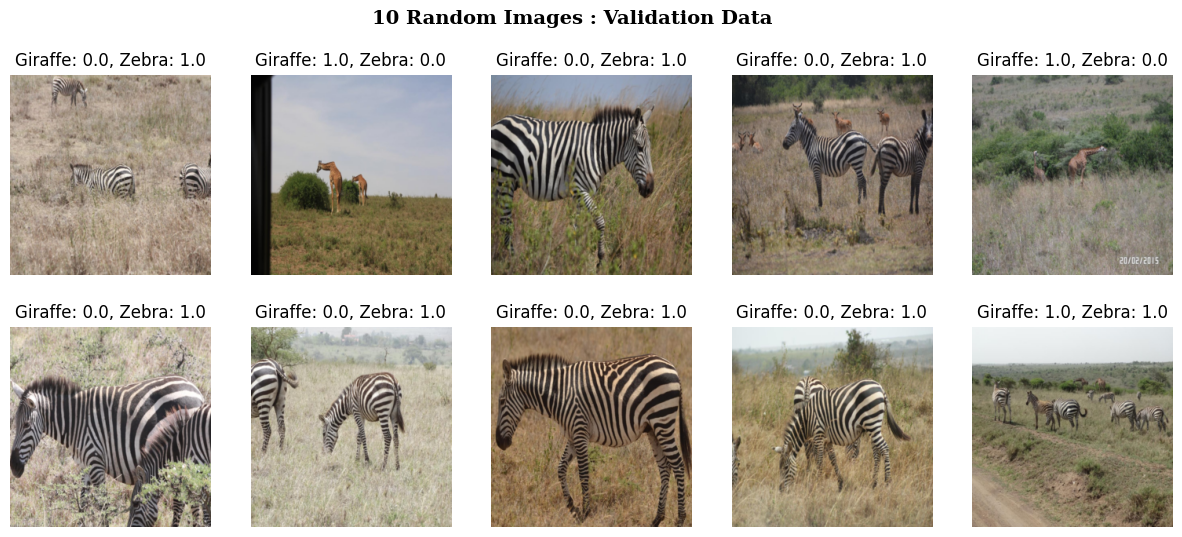

In [40]:
explore_dataset(val_dataset, title="Validation Data")

Statistics : Testing Data
Number of images : 743
Giraffe Count : 83
Zebra Count: 661



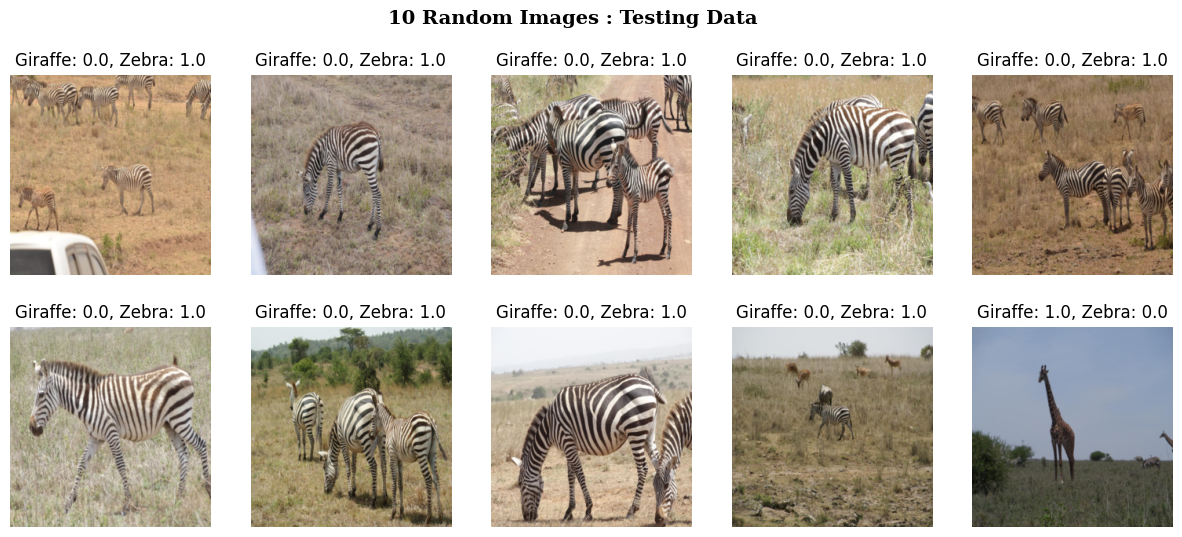

In [41]:
explore_dataset(test_dataset, title="Testing Data")